In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [3]:
coordinates = zip(x, y)
print(coordinates)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    #print(coordinate[0], coordinate[1])
    print(citipy.nearest_city(coordinate[0],coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


In [5]:
city = citipy.nearest_city(22.99, 120.21)
city

In [6]:
city.city_name 

'tainan'

In [7]:
city.country_code

'tw'

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=874420077e6feaade6650c8200445dc8


In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=874420077e6feaade6650c8200445dc8&q=Boston


In [11]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
city_weather.status_code

200

In [13]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [15]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.06,"lat":42.36},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":46.9,"feels_like":40.96,"temp_min":44.01,"temp_max":50,"pressure":1008,"humidity":70},"visibility":16093,"wind":{"speed":5.82,"deg":230},"clouds":{"all":90},"dt":1583209565,"sys":{"type":1,"id":3486,"country":"US","sunrise":1583147845,"sunset":1583188527},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [16]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.06, 'lat': 42.36},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 46.9,
  'feels_like': 40.96,
  'temp_min': 44.01,
  'temp_max': 50,
  'pressure': 1008,
  'humidity': 70},
 'visibility': 16093,
 'wind': {'speed': 5.82, 'deg': 230},
 'clouds': {'all': 90},
 'dt': 1583209565,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1583147845,
  'sunset': 1583188527},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [17]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather Found.")
else:
    print(f"City Weather not found.")

City Weather Found.


In [18]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [32]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Alaska"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -150, 'lat': 64},
 'weather': [{'id': 600,
   'main': 'Snow',
   'description': 'light snow',
   'icon': '13n'}],
 'base': 'stations',
 'main': {'temp': -5.8,
  'feels_like': -16.98,
  'temp_min': -5.8,
  'temp_max': -5.8,
  'pressure': 997,
  'humidity': 83},
 'visibility': 11265,
 'wind': {'speed': 8.05, 'deg': 10},
 'clouds': {'all': 90},
 'dt': 1583210547,
 'sys': {'type': 1,
  'id': 7719,
  'country': 'US',
  'sunrise': 1583168490,
  'sunset': 1583205768},
 'timezone': -32400,
 'id': 5879092,
 'name': 'Alaska',
 'cod': 200}

In [33]:
# Get the JSON data.
boston_data = city_weather.json()

In [34]:
boston_data['sys']

{'type': 1,
 'id': 7719,
 'country': 'US',
 'sunrise': 1583168490,
 'sunset': 1583205768}

In [39]:
weather_description = boston_data['weather'][0]['main']
if weather_description == 'Rain':
    print(boston_data['rain']['3h'])
if weather_description =='Snow':
    print(boston_data['snow']['3h'])
if weather_description == 'Clouds':
    print(boston_data['clouds']['all'])

KeyError: 'snow'

In [19]:
boston_data['sys']['country']

'US'

In [20]:
boston_data['dt']

1583175332

In [21]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.36 -71.06 55 53 1 20.8


In [22]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data['dt']
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2020, 3, 2, 18, 55, 32)

In [23]:
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2020-03-02 18:55:32'

In [33]:
# Import the time module.
import time
import matplotlib.pyplot as plt
# Get today's date in seconds.
today = time.time()
today

1583196055.567817

In [34]:
today = time.strftime("%x")
today

'03/02/20'

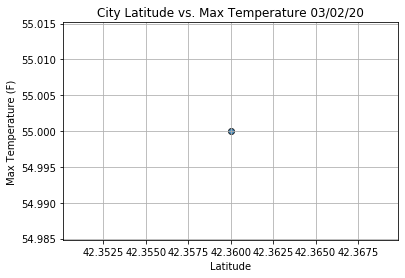

In [37]:
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lat,
            max_temp,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
#plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()